# Handson - Regression

In this hands-on session, you will practice applying regression analysis on a dataset to *predict* a variable based on one or several other variables. Regression Analysis is known as one of predictive methods.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

**Load the house price datast from `house_price.csv` and inspect its variables. You may use pandas profiling for this purpose.**

In [2]:
df = pd.read_csv('./house_price.csv')
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
# Some basic data cleansing

df = df.drop(columns=df.dtypes[df.dtypes == object].index)
df = df.dropna()

**1. Use np.corr() method to calculate correlation matrix between every pair of variables in the dataset.**

**2. Visualize the correlation matrix with a heatmap. You may use Matplotlib or Seaborn.**

**3. Find the variable that is the most correlated with house price (`SalePrice` column).**

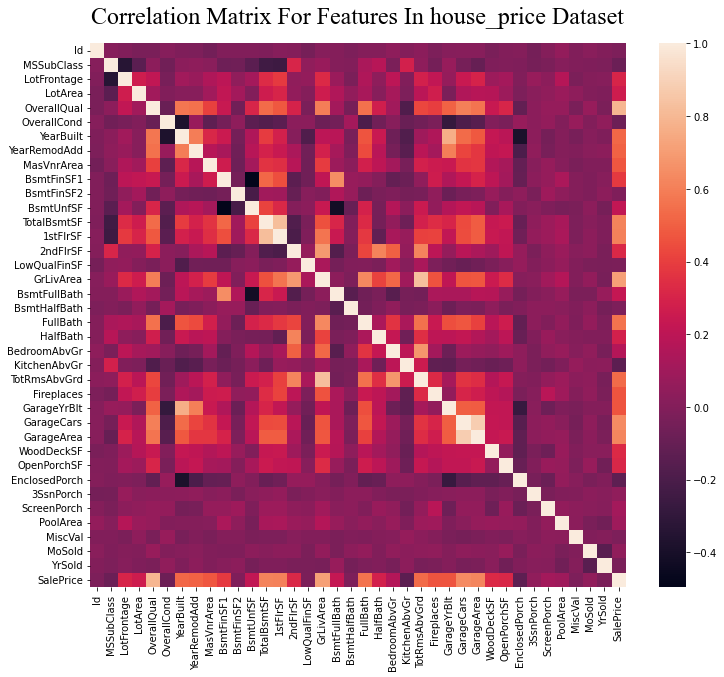

In [5]:
import seaborn as sns

plt.figure(figsize=(12, 10))
corr = df.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

plt.title('Correlation Matrix For Features In house_price Dataset', fontdict={'fontsize': 24, 'fontfamily': 'Times New Roman'}, pad=20)
plt.show()

**1. Find top 5 variables that are the most correlated with house price.**

**2. Draw a heatmap for correlation matrix between these 5 variables and house price.**


In [6]:
# 1
corr['SalePrice'].sort_values()[-5:]

GarageArea     0.623431
GarageCars     0.640409
GrLivArea      0.708624
OverallQual    0.790982
SalePrice      1.000000
Name: SalePrice, dtype: float64

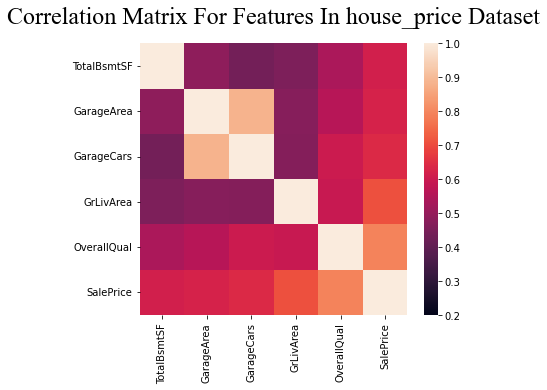

In [7]:
# 2
five_top_cols_with_house_price = corr['SalePrice'].sort_values()[-6:].index
plt.figure(figsize=(6, 5))
five_top_corr = corr.loc[five_top_cols_with_house_price, five_top_cols_with_house_price]
sns.heatmap(five_top_corr, 
        xticklabels=five_top_corr.columns,
        yticklabels=five_top_corr.columns,
        vmin=0.2, vmax=1)
plt.title('Correlation Matrix For Features In house_price Dataset', fontdict={'fontsize': 24, 'fontfamily': 'Times New Roman'}, pad=20)
plt.show()

## Univariate Regression Model

**1. Split the dataset into training set and valdation/test set. Your training set should be ~80% of your data.**

**2. Using sklearn.LinearRegression() model, fit a linear regression model on the training set to predict `SalePrice` only based on the variable that is most correlated with `SalePrice`.**

**3. Now, run your model on validation/test set and calculated the mean squared error. Report the error.**

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 1
X = np.expand_dims(
    df[five_top_cols_with_house_price[-2]].to_numpy(), axis=1
)
y = df['SalePrice'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 2
model = LinearRegression().fit(X_train, y_train)

# 3
y_pred = model.predict(X_train)
print(f'MSE on training set = {mean_squared_error(y_train, y_pred)}')
y_pred = model.predict(X_test)
print(f'MSE on validation set = {mean_squared_error(y_test, y_pred)}')

MSE on training set = 2308208284.2185354
MSE on validation set = 2572969092.660074


**1. Draw a scatter plot for `SalePrice` and the variable you employed to predict `SalePrice`.**

**2. In this scatter plot, visualize the regression line.**

**3. Do you think this linear model could predict the price in a reasonably accurate way?**

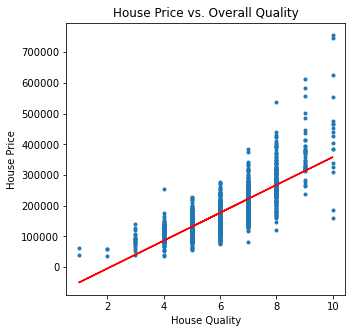

In [58]:
y_pred = model.predict(X)

plt.figure(figsize=(5, 5))
plt.scatter(X, y, marker='.')
plt.plot(X, y_pred, c='red')
plt.title('House Price vs. Overall Quality')
plt.xlabel('House Quality')
plt.ylabel('House Price')
plt.show()

**Repeat the above analysis with a polynomial regression model with degree=2.**

MSE on training set = 1971274898.5867553
MSE on validation set = 2260847781.9358788


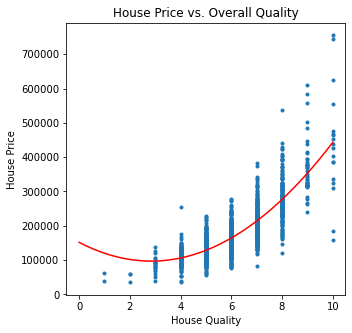

In [59]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=2)
poly_features = poly.fit_transform(X_train)
model = LinearRegression().fit(poly_features, y_train)

y_pred = model.predict(poly.fit_transform(X_train))
print(f'MSE on training set = {mean_squared_error(y_train, y_pred)}')
y_pred = model.predict(poly.fit_transform(X_test))
print(f'MSE on validation set = {mean_squared_error(y_test, y_pred)}')

# plotting results
x = np.expand_dims(np.linspace(0, 10, 100), axis=1)
y_pred = model.predict(poly.fit_transform(x))
plt.figure(figsize=(5, 5))
plt.scatter(X, y, marker='.')
plt.plot(x, y_pred, c='red')
plt.title('House Price vs. Overall Quality')
plt.xlabel('House Quality')
plt.ylabel('House Price')
plt.show()


## Multivariate Regression Model

**1. Fit a linear regression model on training set to predict `SalePrice` based on the top 5 most correlated variables that you found earlier.**

**2. Predict house price on validation/test set.**

**3. Calculate the mean squeared error for the predictions of model. Do you think adding new variables to the model mitigated the error?**

In [68]:
# 1
X = df[five_top_cols_with_house_price[:-1]]
y = df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 2
model = LinearRegression().fit(X_train, y_train)

# 3
y_pred = model.predict(X_train)
print(f'MSE on training set = {mean_squared_error(y_train, y_pred)}')
y_pred = model.predict(X_test)
print(f'MSE on validation set = {mean_squared_error(y_test, y_pred)}')

MSE on training set = 1296696159.081102
MSE on validation set = 2506343555.770264
